In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")

# # Multiple Output display
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
dataset = pd.read_csv("/Users/harshil/Desktop/Wholesale customers data.csv")
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Attribute Information:

1. FRESH: annual spending (m.u.) on fresh products (Continuous);
2. MILK: annual spending (m.u.) on milk products (Continuous);
3. GROCERY: annual spending (m.u.)on grocery products (Continuous);
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7. CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8. REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)


Descriptive Statistics:

- (Minimum, Maximum, Mean, Std. Deviation)
- FRESH ( 3, 112151, 12000.30, 12647.329)
- MILK (55, 73498, 5796.27, 7380.377)
- GROCERY (3, 92780, 7951.28, 9503.163)
- FROZEN (25, 60869, 3071.93, 4854.673)
- DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
- DELICATESSEN (3, 47943, 1524.87, 2820.106)

REGION Frequency

- Lisbon 77
- Oporto 47
- Other Region 316
Total 440

CHANNEL Frequency
- Horeca 298
- Retail 142
Total 440

### Missing data & Type of variables

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


### Analysis:
    
Transforming specific variables into categorical variables

In [4]:
dataset['Channel'] = dataset['Channel'].astype('category')
dataset['Region'] = dataset['Region'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null category
Region              440 non-null category
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: category(2), int64(6)
memory usage: 21.8 KB


#### Data pre-processing for model

In [5]:
# Customer Segmentation by $ Revenue & Country

X = dataset
num_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Creating dummy variables for categorical types
cat_cols = ["Channel", "Region"]
dummies = pd.get_dummies(X[cat_cols])
# dummies.head(5)

# Combining dummy variables and numeric varianbles

X1 = X[num_cols]
X2 = pd.concat([dummies, X1], axis=1)
X = X2

y = dataset["Frozen"]

# Splitting the dataset into the training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.head(5)

X_test0 = X_test
y_test0 = y_test

In [7]:
dummies.head()

,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [9]:
X2.head()

,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,1,0,0,1,12669,9656,7561,214,2674,1338
1,0,1,0,0,1,7057,9810,9568,1762,3293,1776
2,0,1,0,0,1,6353,8808,7684,2405,3516,7844
3,1,0,0,0,1,13265,1196,4221,6404,507,1788
4,0,1,0,0,1,22615,5410,7198,3915,1777,5185


### Principal component analysis

In [10]:
# Checking the variance explained by each principal component

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.46595784879068103,
 0.40473044136593744,
 0.06915995278940268,
 0.0377564565310207,
 0.01603191921308992,
 0.006363379487508994,
 8.365303815710361e-10,
 6.566091152558098e-10,
 3.292197502735766e-10,
 1.11299085090118e-34,
 3.319471567360467e-36]

### Analysis: I shall choose the top 2 principal components.
    
The top 2 principal components explain 86 % variance in the dataset. Beyond the top 2, the marginial gain in variance for adding each principal componenet is significantly reduced.

#### Selecting the top 2 principal components

In [11]:
# Principal component analysis to take the 2 top components

i = 2
from sklearn.decomposition import PCA
pca = PCA(n_components = i)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.46595784879068103, 0.40473044136593744]

### Customer segmentation

#### Elbow method used for customer segmentation based on the top 2 principal componenets

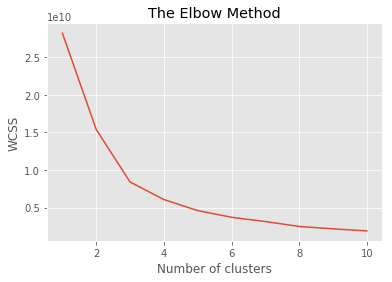

In [12]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Analysis:
    
Based on the above diagram, the optimal number of customer segmenets is 3. After the first 3 segments, the incremental drop in error for every additional segment results is significantly reduced.

#### Distribution of Customers in each segment

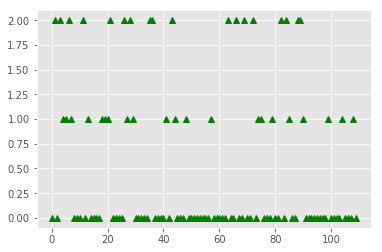

In [18]:
# Fitting K-Means to the dataset
X3 = X_test
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X3)
plt.plot(y_kmeans, 'g^')
plt.show()

### Analysis:
    
There are 3 optimal customer segments based on their buying behavior, most of the customers belong to Cluster # 1 & 2.

- Strategy:
    
As the retail industry is very competitive, and companies are trying to exploit new market opportunities, our client can try to acquire customers in the 1st customer segment using suitable strategic actions; sales and marketing efforts, promotions, bundling etc.

### Visualizing customer segments

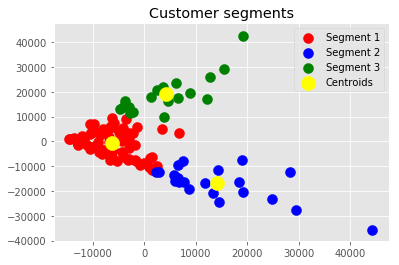

In [19]:
# Visualising the clusters
plt.scatter(X3[y_kmeans == 0, 0], X3[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Segment 1')
plt.scatter(X3[y_kmeans == 1, 0], X3[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Segment 2')
plt.scatter(X3[y_kmeans == 2, 0], X3[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Segment 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Customer segments')
plt.legend()
plt.show()

### Analysis:
    
There are some overlap between segment No. 3 with each of Segment No. 1 & 2 at the boundaries which we need to keep in mind while analyzing customers.

The k-means clustering algorithm being a un-supervised learning algorithm, we can perform a quick visual check on the model's performance based on the visualization chart.

#### Business Strategy:
    
Customer segment # 1 & 2 have opportunities for growth and future expansion. As the retails industry is a saturated industry, hence customer segment # 3 may already be dominated by other retailers so our client can try to increaese sales in the 2 other cutomer segments (# 1 & 2) through suitable competitive positioning, pricing stratgey, cohesive sales & marketing efforts, promotions, bundling etc.

### Customer Segments

In [21]:
Customer_segment_class = pd.DataFrame(y_kmeans)
Customer_segment_class.columns = ["Customer_segment_class"]
X_test2 = X_test0.reset_index(drop=True)

Customer_segments = pd.concat([Customer_segment_class, X_test2], axis = 1)
Customer_segments.head(5)

,Customer_segment_class,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,1,0,1,0,0,1537,3748,5838,1859,3381,806
1,2,0,1,0,0,1,5981,14641,20521,2005,12218,445
2,0,1,0,1,0,0,8040,3795,2070,6340,918,291
3,2,0,1,0,1,0,9759,25071,17645,1128,12408,1625
4,1,1,0,0,0,1,27329,1449,1947,2436,204,1333


In [22]:
# 1st Cluster
mask = Customer_segments["Customer_segment_class"] == 0
Customer_segments_1 = Customer_segments[mask]

# 2nd Cluster
mask = Customer_segments["Customer_segment_class"] == 1
Customer_segments_2 = Customer_segments[mask]

# 3rd Cluster
mask = Customer_segments["Customer_segment_class"] == 2
Customer_segments_3 = Customer_segments[mask]

### Customer Segment Features

### Regions

In [23]:
Customer_segments_1.groupby(["Channel_1", "Channel_2"]).size()
Customer_segments_2.groupby(["Channel_1", "Channel_2"]).size()
Customer_segments_3.groupby(["Channel_1", "Channel_2"]).size()

Channel_1  Channel_2
0          1            18
dtype: int64

In [24]:
Customer_segments_2.groupby(["Channel_1", "Channel_2"]).size()

Channel_1  Channel_2
0          1             3
1          0            18
dtype: int64

In [25]:
Customer_segments_3.groupby(["Channel_1", "Channel_2"]).size()

Channel_1  Channel_2
0          1            18
dtype: int64

### Analysis:
    
For customer segment 1: all customers are from Channel 2

For customer segment 2: majority of customer are from Channel 2

For customer segment 3: although majority of customers are from Channel 2, some also came from Channel 1.

In [32]:
# Customer_segments_1.groupby(["Region_1", "Region_2", "Region_3"]).size()
# Customer_segments_2.groupby(["Region_1", "Region_2", "Region_3"]).size()
# Customer_segments_3.groupby(["Region_1", "Region_2", "Region_3"]).size()

In [33]:
Customer_segments_1.groupby(["Region_1", "Region_2", "Region_3"]).size()

Region_1  Region_2  Region_3
0         0         1           52
          1         0            8
1         0         0           11
dtype: int64

In [34]:
Customer_segments_2.groupby(["Region_1", "Region_2", "Region_3"]).size()

Region_1  Region_2  Region_3
0         0         1           15
          1         0            2
1         0         0            4
dtype: int64

In [35]:
Customer_segments_3.groupby(["Region_1", "Region_2", "Region_3"]).size()

Region_1  Region_2  Region_3
0         0         1           13
          1         0            2
1         0         0            3
dtype: int64

### Analysis:
    
For all 3 customer segments: majority of customers are from Region 3

So Region is not a key factor to segment customers.

### Fresh, Milk & Grocery

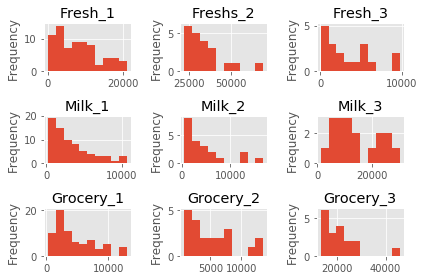

In [36]:
# Fresh

plt.subplot(331)
plt.title('Fresh_1')
Output = None
Customer_segments_1["Fresh"].plot(kind = "hist", bins = 10)

plt.subplot(332)
plt.title('Freshs_2')
Output = None
Customer_segments_2["Fresh"].plot(kind = "hist", bins = 10)

plt.subplot(333)
plt.title('Fresh_3')
Output = None
Customer_segments_3["Fresh"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Milk

plt.subplot(334)
plt.title('Milk_1')
Output = None
Customer_segments_1["Milk"].plot(kind = "hist", bins = 10)

plt.subplot(335)
plt.title('Milk_2')
Output = None
Customer_segments_2["Milk"].plot(kind = "hist", bins = 10)

plt.subplot(336)
plt.title('Milk_3')
Output = None
Customer_segments_3["Milk"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Grocery

plt.subplot(337)
plt.title('Grocery_1')
Output = None
Customer_segments_1["Grocery"].plot(kind = "hist", bins = 10)

plt.subplot(338)
plt.title('Grocery_2')
Output = None
Customer_segments_2["Grocery"].plot(kind = "hist", bins = 10)

plt.subplot(339)
plt.title('Grocery_3')
Output = None
Customer_segments_3["Grocery"].plot(kind = "hist", bins = 10)
plt.tight_layout()

### Analysis:
    
Fresh: Segment # 2 makes significant purchases compared to other segments folloewed by Segment # 3

Milk: Segment # 1 makes significant purchases compared to other segments

Grocery: Segnment # 1 makes significant purchases compared to other segments

### Frozen, Detergent Paper & Delicassen

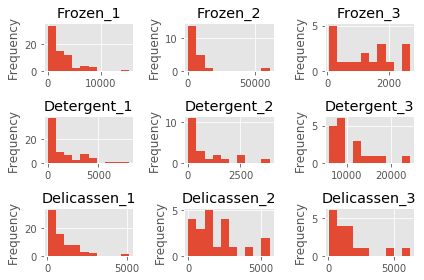

In [37]:
# Frozen

plt.subplot(331)
plt.title('Frozen_1')
Customer_segments_1["Frozen"].plot(kind = "hist", bins = 10)

plt.subplot(332)
plt.title('Frozen_2')
Customer_segments_2["Frozen"].plot(kind = "hist", bins = 10)

plt.subplot(333)
plt.title('Frozen_3')
Customer_segments_3["Frozen"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Detergent Paper

plt.subplot(334)
plt.title('Detergent_1')
Customer_segments_1["Detergents_Paper"].plot(kind = "hist", bins = 10)

plt.subplot(335)
plt.title('Detergent_2')
Customer_segments_2["Detergents_Paper"].plot(kind = "hist", bins = 10)

plt.subplot(336)
plt.title('Detergent_3')
Customer_segments_3["Detergents_Paper"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Delicassen

plt.subplot(337)
plt.title('Delicassen_1')
Customer_segments_1["Delicassen"].plot(kind = "hist", bins = 10)

plt.subplot(338)
plt.title('Delicassen_2')
Customer_segments_2["Delicassen"].plot(kind = "hist", bins = 10)

plt.subplot(339)
plt.title('Delicassen_3')
Customer_segments_3["Delicassen"].plot(kind = "hist", bins = 10)
plt.tight_layout()

### Analysis:
    
Frozen: Segment # 2 makes significant purchases followed by Segment # 3

Detergent_Paper: Segment # 1 is a major purchaser

Delicassen: Segnment # 2 on average makes most purchases, followed by Segmnet # 1

### Applying 80/20 Rule (Pareto principle)

### Top 20% customers, products & geographic locations resulting in 80% of $ sales